In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
#sns.set_theme()
#%config InlineBackend.figure_format = 'retina'

import scipy.stats as stats
import pylab
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,classification_report,precision_recall_curve,confusion_matrix,roc_curve
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRFClassifier
from sklearn.neural_network import MLPClassifier
filterwarnings('ignore')

ModuleNotFoundError: No module named 'imblearn'

In [4]:
train='train.csv'
df=pd.read_csv(train)
df

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

**DATA EXPLORATION**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

We can see that there is no missing values in our dataset .Thus we do not need to impute any values and can proceed for further analysis

In [ ]:
df.shape

(381109, 12)

In [ ]:
df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [ ]:
df.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


In [ ]:
print(df['Age'].mean())
print(df['Vehicle_Age'].unique())

38.822583565331705
['> 2 Years' '1-2 Year' '< 1 Year']


In [ ]:
df.duplicated().value_counts().to_frame('values')

,values
False,381109


In [ ]:
df.drop(['id'],axis=1,inplace=True)
df.drop(['Region_Code'],axis=1,inplace=True)
df.drop(['Policy_Sales_Channel'],axis=1,inplace=True)

So we can see there is no duplicate elements present in our dataset


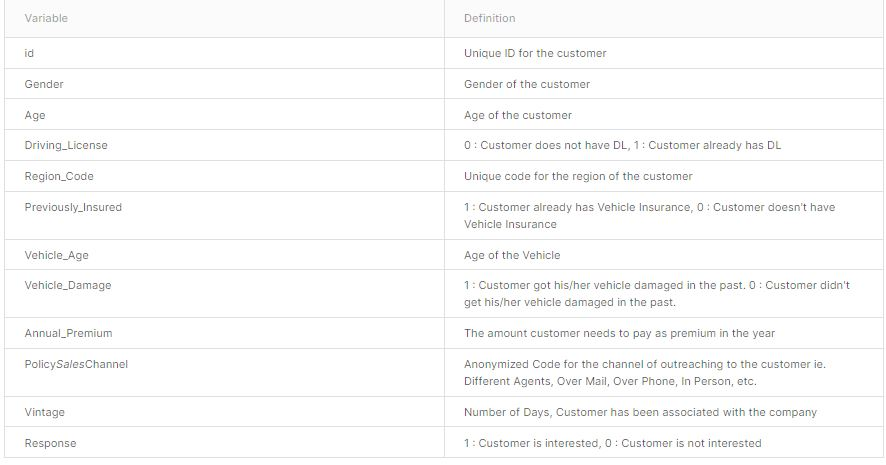

**BUISNESS MODEL -**
Predict, whether the customer would be interested in Vehicle insurance, we have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

In [ ]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
feature=[ 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response']

In [ ]:
 list(enumerate(feature))

[(0, 'Gender'),
 (1, 'Age'),
 (2, 'Driving_License'),
 (3, 'Region_Code'),
 (4, 'Previously_Insured'),
 (5, 'Vehicle_Age'),
 (6, 'Vehicle_Damage'),
 (7, 'Annual_Premium'),
 (8, 'Policy_Sales_Channel'),
 (9, 'Vintage'),
 (10, 'Response')]

In [ ]:
df.skew(axis=0).to_frame('Skewed Values')

,Skewed Values
Age,0.672539
Driving_License,-21.595182
Previously_Insured,0.167747
Annual_Premium,1.766087
Vintage,0.003030
Response,2.301906


**UNIVARIATE ANALYSIS**

<AxesSubplot:xlabel='Response', ylabel='count'>

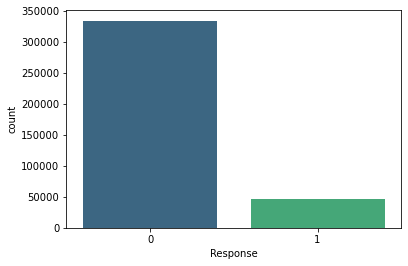

In [ ]:
sns.countplot(df['Response'],palette="viridis")

In [ ]:
print('Negative Responses %',(df['Response'].value_counts()[0]/len(df))*100)
print('Positive Responses %',(df['Response'].value_counts()[1]/len(df))*100)

Negative Responses % 87.74366388618479
Positive Responses % 12.256336113815209


From the above graph and percentages we can clearly see that negative response is more than positive response in terms of buying insurance 


<AxesSubplot:xlabel='Driving_License', ylabel='count'>

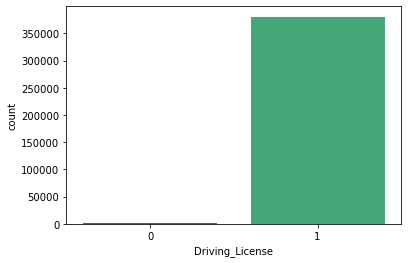

In [ ]:
sns.countplot(df['Driving_License'],palette="viridis")

Text(0.5, 1.0, 'Gender vs Response')

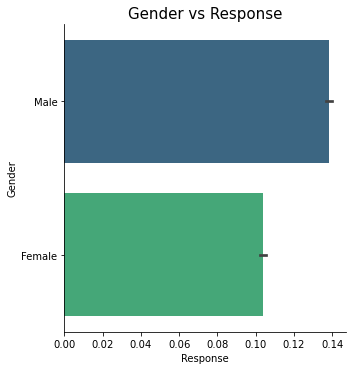

In [ ]:
sns.catplot(x='Response',y='Gender',data=df,kind='bar',palette="viridis")
plt.title('Gender vs Response',fontsize=15)

From this graph we can clearly see that Male are having positive response towards insurance purchase while female are having negative response.Thus from this we can conclude that the most targeted customers are Male than Female.So, we need to focus on strengthening the Female customers buyers for buying the insurance.

<AxesSubplot:title={'center':'Different Age Analysis'}, xlabel='Age', ylabel='count'>

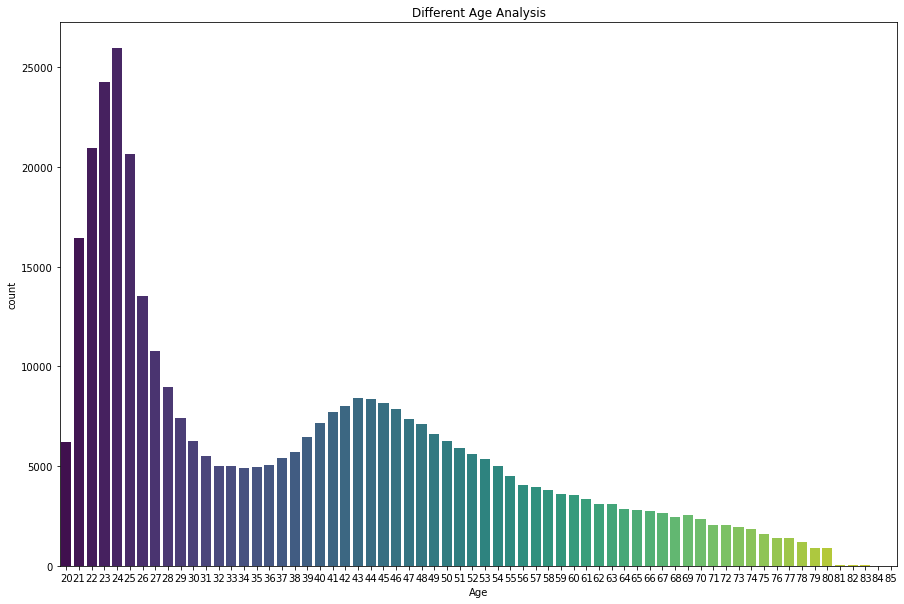

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Different Age Analysis')
sns.countplot(df['Age'],palette='viridis')

Text(0, 0.5, 'Resonse')

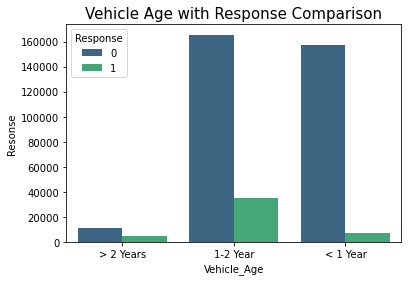

In [ ]:
sns.countplot(df['Vehicle_Age'],hue=df['Response'],palette='viridis')
plt.title('Vehicle Age with Response Comparison',fontsize=15)
plt.ylabel('Resonse')

We can see that buyers whose vehicle are between 1 to 2 years are more entrusted to buy insurance rather whose vehicle are less than 1 year or more than 2 years.

Text(0.5, 1.0, 'Age Vs People Buying And Not Buying Insurance')

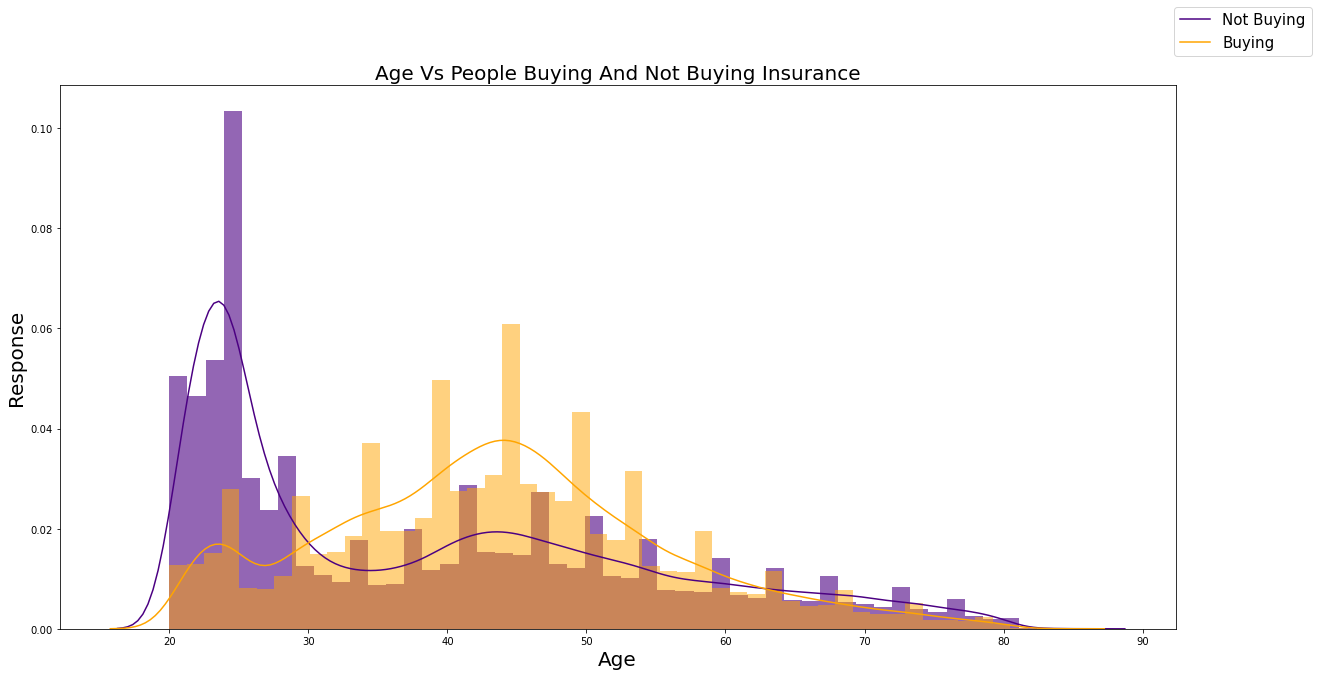

In [ ]:
fig=plt.figure(figsize=(20,10))
sns.distplot(df[df['Response']==0]['Age'],color='indigo',hist_kws={'alpha':0.6})
sns.distplot(df[df['Response']==1]['Age'],color='orange',hist_kws={'alpha':0.5})
fig.legend(labels=['Not Buying','Buying'],fontsize=15)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Response',fontsize=20)
plt.title('Age Vs People Buying And Not Buying Insurance',fontsize=20)

Text(0.5, 1.0, 'Annual Premium Vs Not Buying Insurance ')

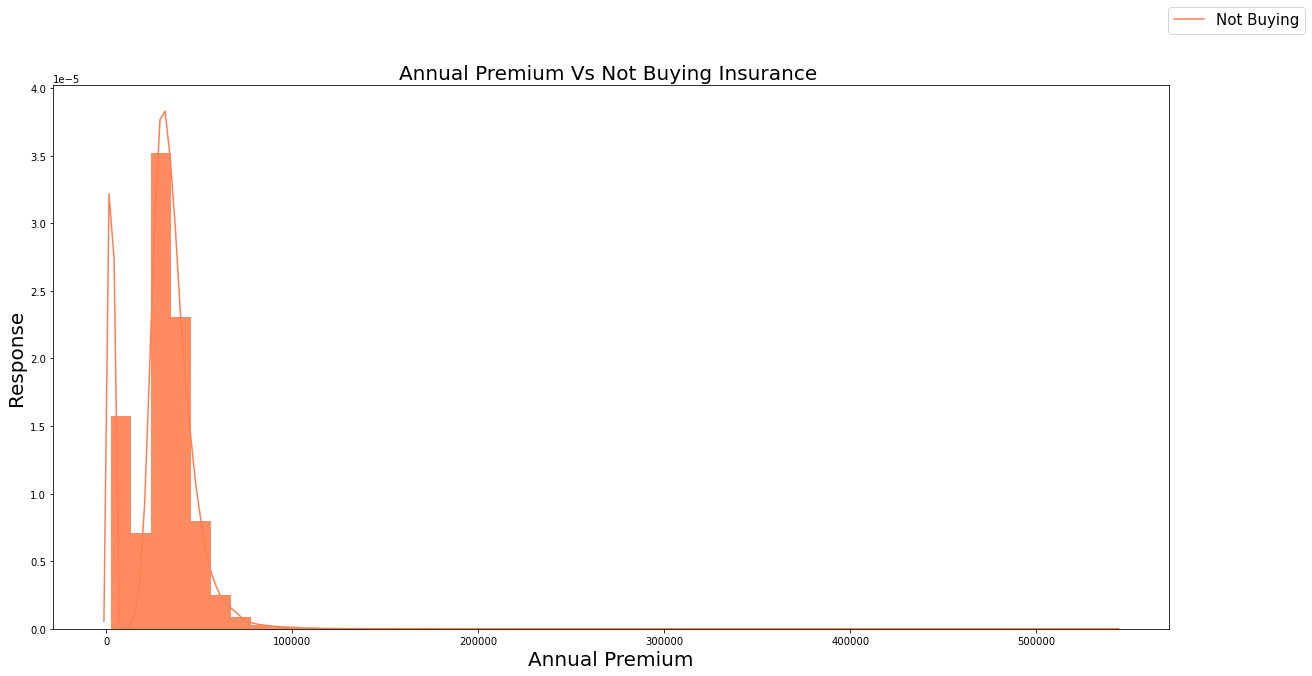

In [ ]:
fig=plt.figure(figsize=(20,10))
sns.distplot(df[df['Response']==0]['Annual_Premium'],color='coral',hist_kws={'alpha':0.9})
fig.legend(labels=['Not Buying'],fontsize=15)
plt.xlabel('Annual Premium',fontsize=20)
plt.ylabel('Response',fontsize=20)
plt.title('Annual Premium Vs Not Buying Insurance ',fontsize=20)

Text(0.5, 1.0, 'Annual Premium Vs People Buying ')

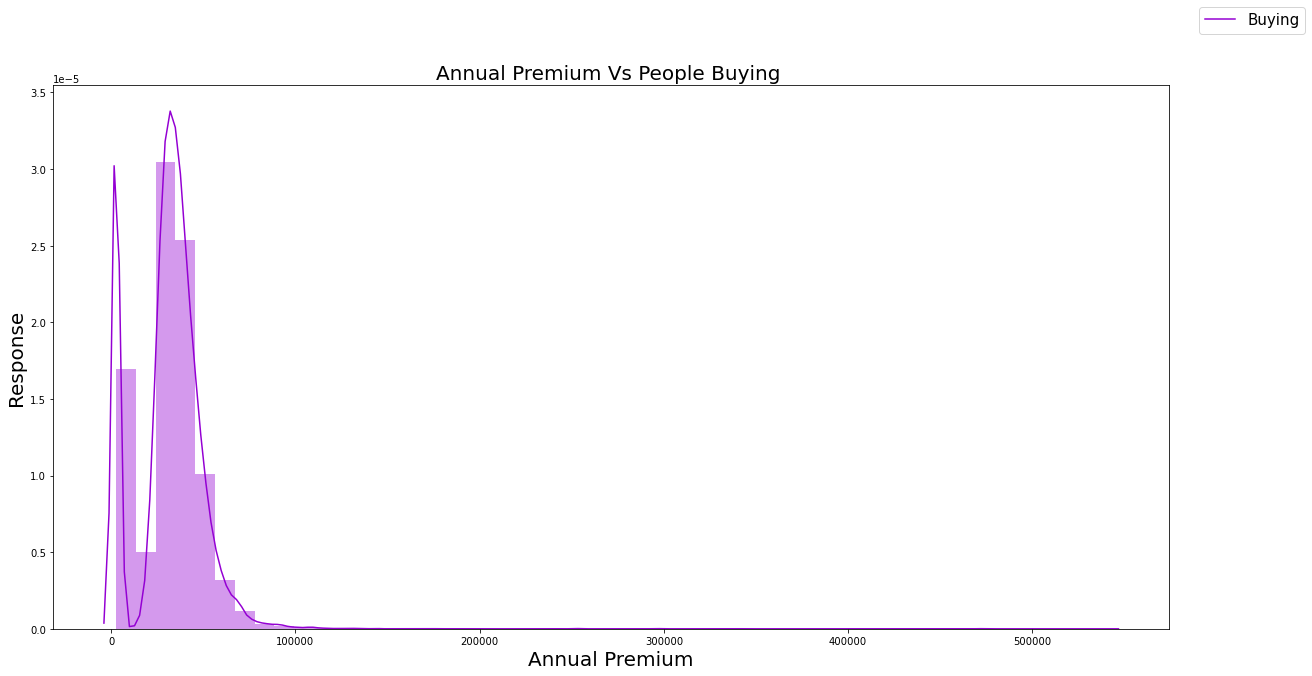

In [ ]:
fig=plt.figure(figsize=(20,10))
sns.distplot(df[df['Response']==1]['Annual_Premium'],color='darkviolet',hist_kws={'alpha':0.4})
fig.legend(labels=['Buying'],fontsize=15)
plt.xlabel('Annual Premium',fontsize=20)
plt.ylabel('Response',fontsize=20)
plt.title('Annual Premium Vs People Buying ',fontsize=20)

Text(0, 0.5, 'Response')

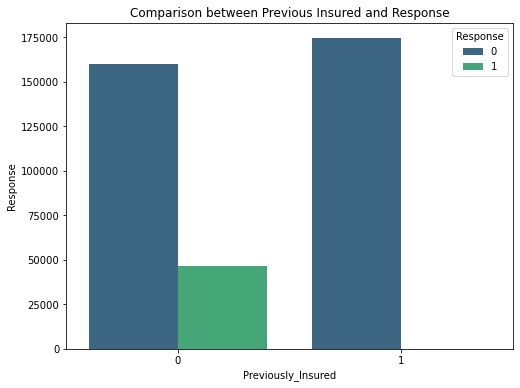

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df['Previously_Insured'],hue=df['Response'],palette='viridis')
plt.title('Comparison between Previous Insured and Response')
plt.ylabel('Response')

In [ ]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Vintage', 'Response'],
      dtype='object')

Text(0, 0.5, 'Response')

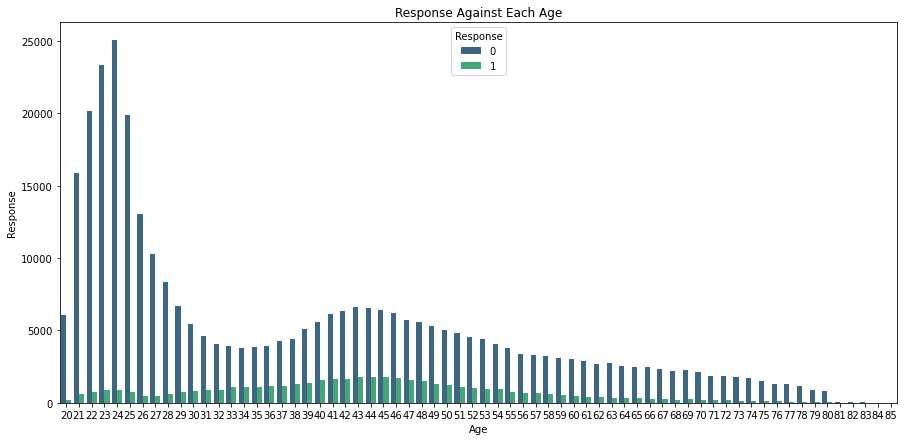

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(df['Age'],hue=df['Response'],palette='viridis')
plt.title('Response Against Each Age')
plt.ylabel('Response')

From this we can understand the different Ages of People are buing the      insurance :-

*   Thus, it clearly shows that the trend of positive resoponse for buying the insurance increases between 21 to 25 and then again it get decreases from the Age 26 there is a little dip that shows that people in that age group are not interested in buying the insurance.
*   From Age 30 till 46 it shows people trust for need of buying insurance increases and this shows that people from this age group are becoming more cautious for their future.
*  From Age 47 we can see that the trend is decreasing, it may happen that people already bought long-term insurance thus the people are not investing in more insurances or because people dont want to invest in their Old Age. 





**MULTIVARIATE ANALYSIS**

In [ ]:
bin=np.linspace(min(df['Age']),max(df['Age']),5)
groups=['Young_Age','Medium_Age','Old_Age','Senior_Citizen']
df['Age-binned']=pd.cut(df['Age'],bins=bin,labels=groups)

Text(0, 0.5, 'Response')

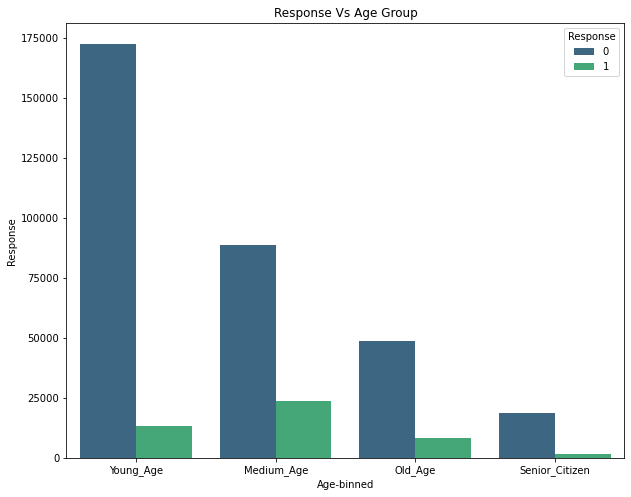

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(df['Age-binned'],hue=df['Response'],palette='viridis')
plt.title('Response Vs Age Group')
plt.ylabel('Response')

From the above graph again we can categorise which Age group people are having more positive positive response and negative response


*   From this we can understand that people in Middle Age group are having more positive response and less negative response but the Young Age group are have more negative response than positive response and also the negative response among this group is more than any Age category group thus we need to increase the alertness or better the product offering for this category of Age group so that we get more positive response from this Age group and also from other Age group.




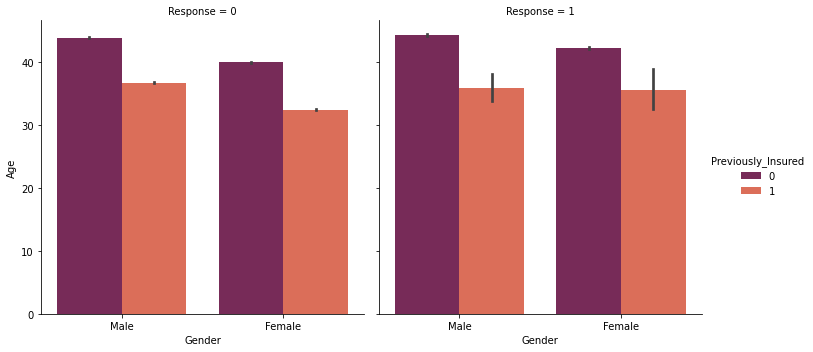

In [ ]:
sns.catplot(x='Gender',y='Age',hue='Previously_Insured',col='Response',data=df,kind='bar',palette='rocket')

In this we can understand that the negative response among Male are little over the Age 40 for those who are not previously insured and also Age between 30 to 40 also have higher negative response and that same with female also who are not previously insured upto Age 40 and upto Age 30 for those previously insured

We can see that positive response for Male are above 40 for those who were not previously insured against those who were previously insured and same for Female also that Age little over 40 have more positive response for not previously insured against those who were already previously insured

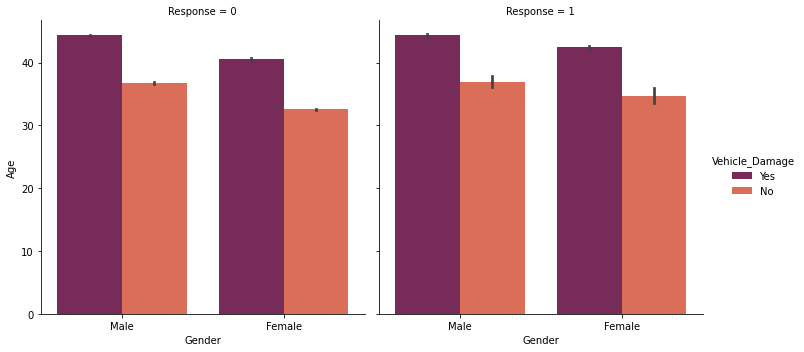

In [ ]:
sns.catplot(x='Gender',y='Age',hue='Vehicle_Damage',col='Response',data=df,kind='bar',palette='rocket')

<AxesSubplot:>

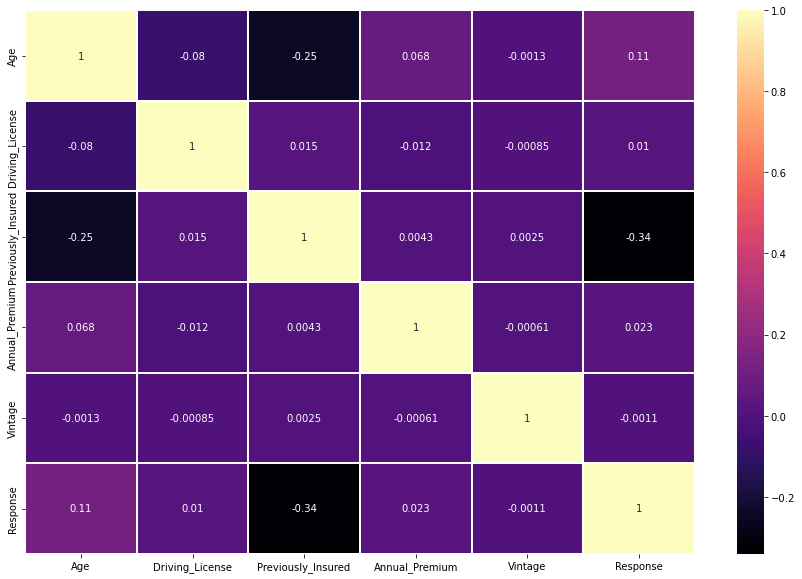

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linecolor='white',cmap='magma',linewidths=2)

<AxesSubplot:xlabel='Gender', ylabel='Annual_Premium'>

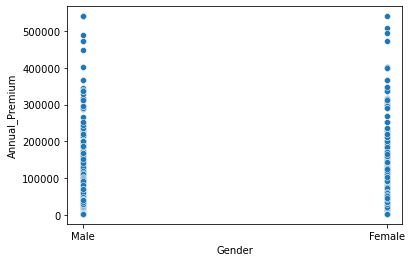

In [ ]:
sns.scatterplot(x='Gender',y='Annual_Premium',data=df)

In [ ]:
#sns.pairplot(df,hue='Response',palette='viridis')

**From the overall analysis :-**


*   **We can understand that some of the product offering of the insurance company is good proposition for the buyers and thus getting positive response among few categories.** 

* **Overall there many negative response than positive response from the customers thus we can assume that most of the product offering from the insurance company are degraded or the customer after sales response is not good or the product offering are not covering today's world customer needs or there is lack of marketing strategy from the insurance company.**


 *   **Thus, We can conclude that the insurance company overall need to improve in terms of all offerings and also increasing the marketability of the product so that those negative responses can be converted more positive responses.**





**CHECKING SKEWNESS BUT THIS WILL RESOLVE AFTER RESAMPLING**

In [ ]:
df.skew()

Age                    0.672539
Driving_License      -21.595182
Previously_Insured     0.167747
Annual_Premium         1.766087
Vintage                0.003030
Response               2.301906
dtype: float64

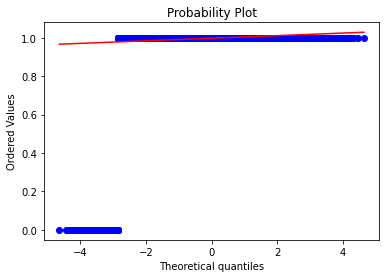

In [ ]:
stats.probplot(df.Driving_License,plot=pylab);

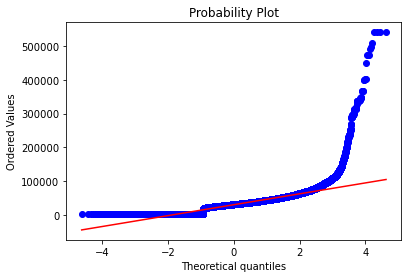

In [ ]:
stats.probplot(df.Annual_Premium,plot=pylab);

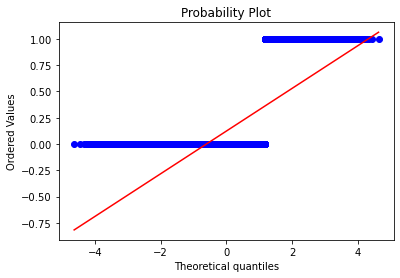

In [ ]:
stats.probplot(df.Response,plot=pylab);

**OUTLIER TREATMENT**

<AxesSubplot:xlabel='Response', ylabel='Vintage'>

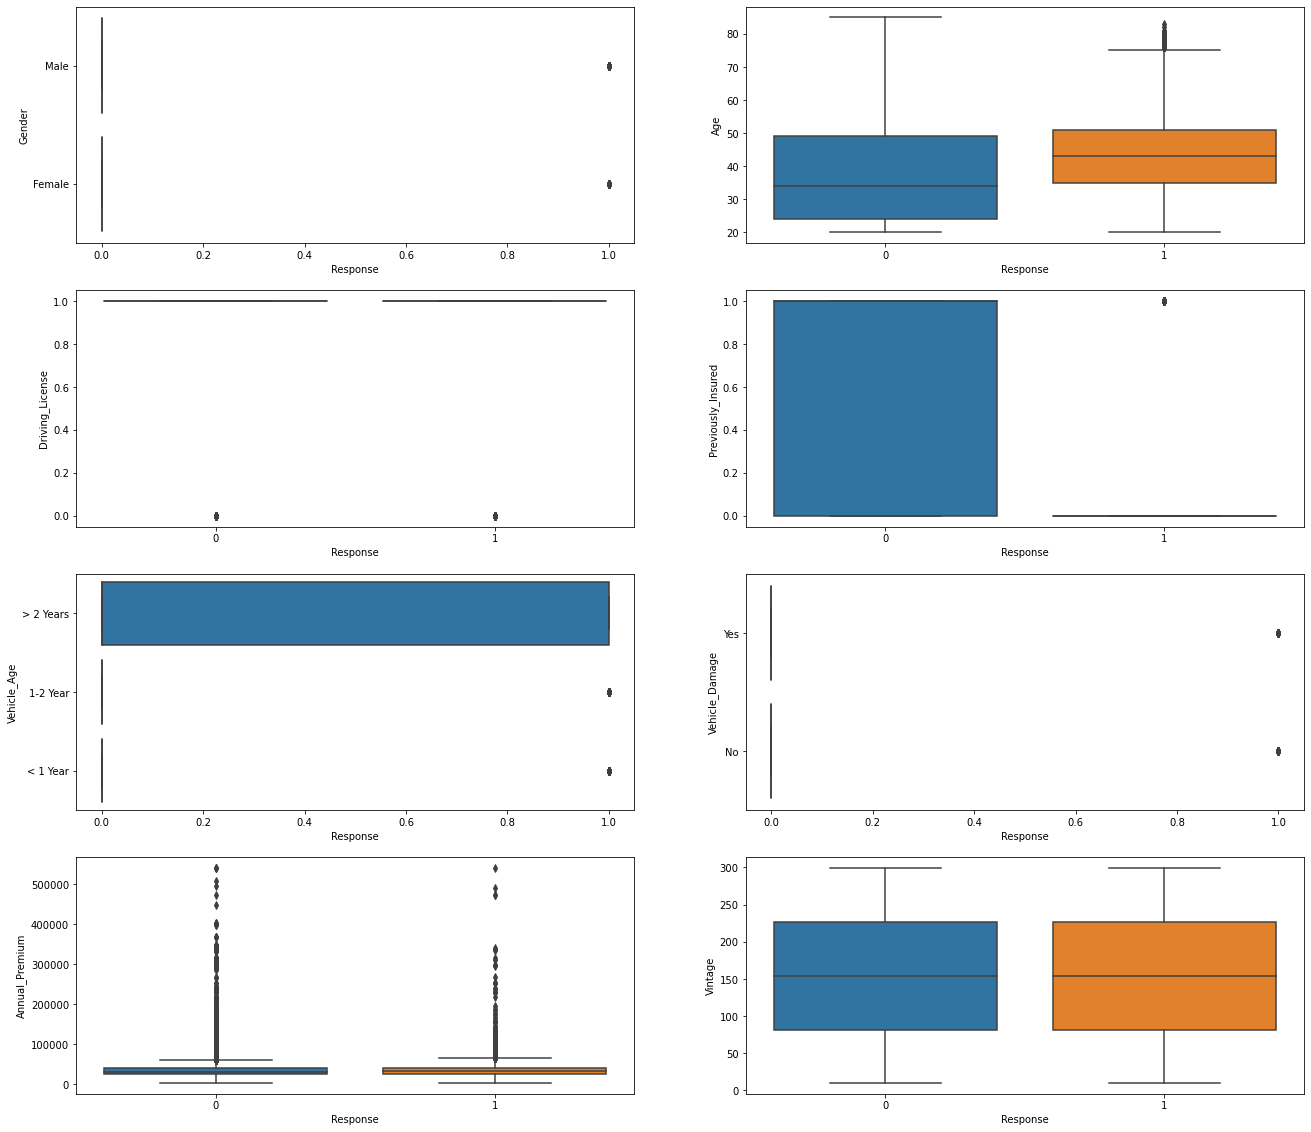

In [ ]:
fig, axes = plt.subplots(4,2, figsize=(22,20))

sns.boxplot(ax=axes[0, 0], data=df, x='Response', y='Gender')
sns.boxplot(ax=axes[0, 1], data=df, x='Response', y='Age')
sns.boxplot(ax=axes[1, 0], data=df, x='Response', y='Driving_License')
sns.boxplot(ax=axes[1, 1], data=df, x='Response', y='Previously_Insured')
sns.boxplot(ax=axes[2, 0], data=df, x='Response', y='Vehicle_Age')
sns.boxplot(ax=axes[2, 1], data=df, x='Response', y='Vehicle_Damage')
sns.boxplot(ax=axes[3, 0], data=df, x='Response', y='Annual_Premium')
sns.boxplot(ax=axes[3, 1], data=df, x='Response', y='Vintage')

In [ ]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [ ]:
lowerbound,upperbound = outlier_treatment(df.Annual_Premium)

In [ ]:
df[(df.Annual_Premium < lowerbound) | (df.Annual_Premium > upperbound)]

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response,Age-binned
25,Female,21,1,1,< 1 Year,No,61964.0,72,0,Young_Age
37,Female,25,1,1,< 1 Year,No,76251.0,107,0,Young_Age
67,Male,60,1,0,1-2 Year,Yes,66338.0,73,0,Old_Age
139,Male,21,1,1,< 1 Year,No,62164.0,116,0,Young_Age
149,Female,22,1,1,< 1 Year,No,76651.0,258,0,Young_Age
...,...,...,...,...,...,...,...,...,...,...
380959,Male,25,1,1,< 1 Year,No,61909.0,161,0,Young_Age
380998,Female,33,1,0,1-2 Year,Yes,101664.0,21,0,Young_Age
381035,Female,22,1,1,< 1 Year,No,62889.0,295,0,Young_Age
381047,Female,52,1,1,1-2 Year,No,71915.0,233,0,Medium_Age


In [ ]:
df.drop(df[ (df.Annual_Premium > upperbound) | (df.Annual_Premium < lowerbound) ].index , inplace=True)

<AxesSubplot:xlabel='Response', ylabel='Annual_Premium'>

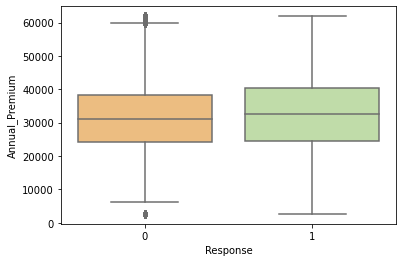

In [ ]:
sns.boxplot( x='Response', y='Annual_Premium',data=df,palette='Spectral')

In [ ]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Vintage', 'Response',
       'Age-binned'],
      dtype='object')

**LABEL ENCODING - CONVERTING CATEGORICAL TO NUMERIC VALUE**

In [ ]:
df['Gender'] = pd.get_dummies(df['Gender'],drop_first=True)

In [ ]:
label = LabelEncoder()
df['Vehicle_Age']=label.fit_transform(df['Vehicle_Age'])
df['Vehicle_Damage']=label.fit_transform(df['Vehicle_Damage'])
df['Gender']=pd.get_dummies(df["Gender"],drop_first=True)

In [ ]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Vintage', 'Response',
       'Age-binned'],
      dtype='object')

In [ ]:
feature = [ 'Gender', 'Driving_License', 
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
       'Response']

**MODEL RESAMPLING - AS THE DATASET IS IMBALANCED**

In [ ]:
smote = SMOTE(random_state=1,n_jobs=-1)

In [ ]:
x_sample,y_sample = smote.fit_resample(df.iloc[:,:-2],df['Response'])

In [ ]:
x_frame = pd.DataFrame(x_sample,columns=['Gender', 'Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
                              'Vehicle_Damage', 'Annual_Premium', 'Vintage'])

In [ ]:
x_frame.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage
0,1,44,1,0,2,1,40454.0,217
1,1,76,1,0,0,0,33536.0,183
2,1,47,1,0,2,1,38294.0,27
3,1,21,1,1,1,0,28619.0,203
4,0,29,1,1,1,0,27496.0,39


In [ ]:
y_frame = pd.DataFrame(y_sample,columns=['Response'])

In [ ]:
y_frame.head()

,Response
0,1
1,0
2,1
3,0
4,0


In [ ]:
y=y_frame.copy()

In [ ]:
x=x_frame.copy()

[0.01419115 0.14152657 0.00027026 0.20870628 0.06439918 0.15421406
 0.22922491 0.18746758]


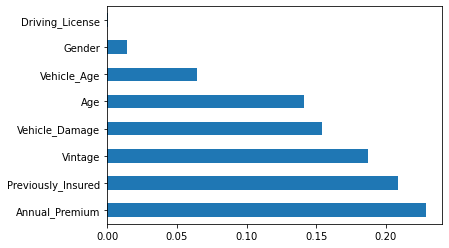

In [ ]:
model = ExtraTreesClassifier()
model = model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based clas
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [ ]:
x=x_frame.drop(['Driving_License'],axis=1,inplace=True)
x=x_frame.copy()

In [ ]:
x.head()

,Gender,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage
0,1,44,0,2,1,40454.0,217
1,1,76,0,0,0,33536.0,183
2,1,47,0,2,1,38294.0,27
3,1,21,1,1,0,28619.0,203
4,0,29,1,1,0,27496.0,39


**MODEL SPLITTING**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

**MODEL SCALING**

In [ ]:
scaler = StandardScaler().fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

**MODEL BUILDING**

**LOGISTIC REGRESSION**

In [ ]:
lr=LogisticRegression(random_state = 0,n_jobs = -1)
clf_l = lr.fit(x_train_s,y_train)
y_pred_log = clf_l.predict(x_test_s)
print(accuracy_score(y_test,y_pred_log)*100)
print(roc_auc_score(y_test,y_pred_log)*100)

77.46300817377329
77.42026164228072


In [ ]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.87      0.65      0.74     97363
           1       0.72      0.90      0.80     98018

    accuracy                           0.77    195381
   macro avg       0.79      0.77      0.77    195381
weighted avg       0.79      0.77      0.77    195381



Text(51.0, 0.5, 'Actual')

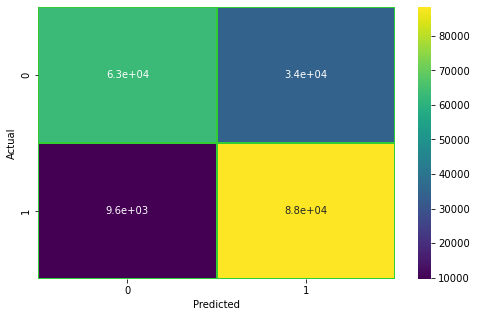

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test,y_pred_log),cmap = 'viridis',annot = True,linewidths = 2,linecolor = 'limegreen',fmt = '.2g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

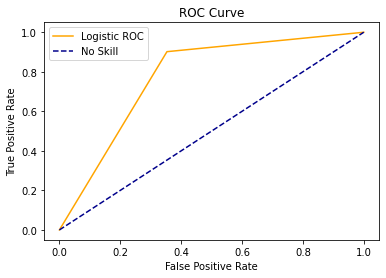

In [ ]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_log)
plt.plot(fpr, tpr, color='orange', label='Logistic ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**RANDOM FOREST CLASSIFIER**

In [ ]:
rfc = RandomForestClassifier(random_state = 1,n_jobs = -1)
clf_r = rfc.fit(x_train_s,y_train)
y_pred_r = clf_r.predict(x_test_s)
print(accuracy_score(y_test,y_pred_r)*100)
print(roc_auc_score(y_test,y_pred_r)*100)

84.10541454900937
84.08746476304945


In [ ]:
print(classification_report(y_test,y_pred_r))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83     97363
           1       0.81      0.89      0.85     98018

    accuracy                           0.84    195381
   macro avg       0.84      0.84      0.84    195381
weighted avg       0.84      0.84      0.84    195381



Text(51.0, 0.5, 'Actual')

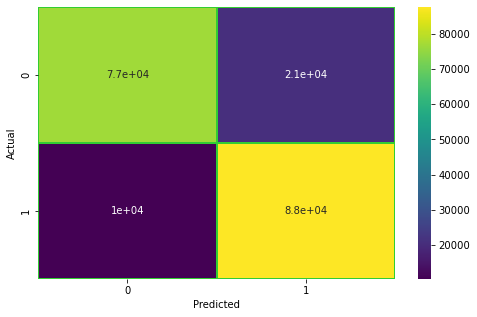

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test,y_pred_r),cmap = 'viridis',annot = True,linewidths = 2,linecolor = 'limegreen',fmt = '.2g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

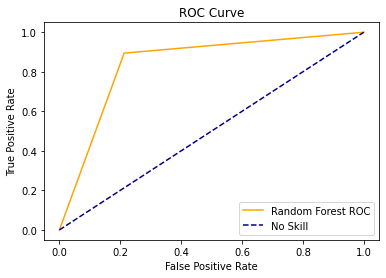

In [ ]:
fpr1,tpr1,threshold=roc_curve(y_test,y_pred_r)
plt.plot(fpr1, tpr1, color='orange', label='Random Forest ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
import pickle

In [ ]:
#pickle.dump(rfc , open('rand_model.sav','wb'))

In [ ]:
pickle.dump(rfc , open('rand_model1.pkl','wb'))

In [ ]:
model_pred= pickle.load(open('rand_model1.pkl','rb'))
#print(model.predict([[40454.0,44,26.0,21,1,1,3,0,1]]))

print(model_pred.predict([[1,44,0,3,1,40454.0,21]]))

In [ ]:
#model_pred= pickle.load(open('rand_model.sav','rb'))
#print(model.predict([[40454.0,44,26.0,21,1,1,3,0,1]]))

#print(model_pred.predict([[1,44,0,3,1,40454.0,21]]))

[0]


**XGBOOST CLASSIFIER**

In [ ]:
xgbc = XGBClassifier(n_jobs = -1,n_estimators=150,learning_rate=0.01)
clf_x = xgbc.fit(x_train_s,y_train)
y_pred_x = clf_x.predict(x_test_s)
print(accuracy_score(y_test,y_pred_x)*100)
print(roc_auc_score(y_test,y_pred_x)*100)

[22:02:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
81.78686770975683
81.7557518199031


In [ ]:
print(classification_report(y_test,y_pred_x))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80     97363
           1       0.77      0.91      0.83     98018

    accuracy                           0.82    195381
   macro avg       0.83      0.82      0.82    195381
weighted avg       0.83      0.82      0.82    195381



Text(51.0, 0.5, 'Actual')

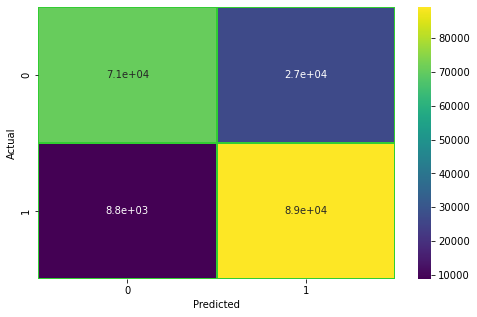

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test,y_pred_x),cmap = 'viridis',annot = True,linewidths = 2,linecolor = 'limegreen',fmt = '.2g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

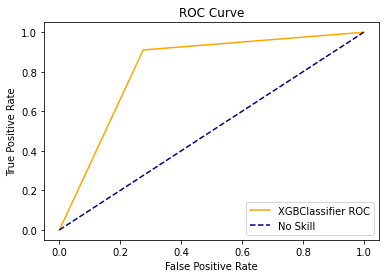

In [ ]:
fpr2,tpr2,threshold=roc_curve(y_test,y_pred_x)
plt.plot(fpr2, tpr2, color='orange', label='XGBClassifier ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
#pickle.dump(xgbc, open('xgbc_model.sav','wb'))

In [ ]:
pickle.dump(xgbc, open('xgbc_model1.pkl','wb'))

In [ ]:
model_pred= pickle.load(open('xgbc_model1.pkl','rb'))
#print(model.predict([[40454.0,44,26.0,21,1,1,3,0,1]]))

print(model_pred.predict([[1,44,0,3,1,40454.0,21]]))

In [ ]:
#model_pred= pickle.load(open('xgbc_model.sav','rb'))
#print(model.predict([[40454.0,44,26.0,21,1,1,3,0,1]]))

#print(model_pred.predict([[1,44,0,3,1,40454.0,21]]))

[0]


**KNN**

In [ ]:
knn=KNeighborsClassifier(n_jobs = -1,n_neighbors = 8)
clf_k = knn.fit(x_train_s,y_train)
y_pred_k = clf_k.predict(x_test_s)
print(accuracy_score(y_test,y_pred_k)*100)
print(roc_auc_score(y_test,y_pred_k)*100)

81.90816916690979
81.89553958628069


In [ ]:
print(classification_report(y_test,y_pred_k))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81     97363
           1       0.80      0.86      0.83     98018

    accuracy                           0.82    195381
   macro avg       0.82      0.82      0.82    195381
weighted avg       0.82      0.82      0.82    195381



Text(51.0, 0.5, 'Actual')

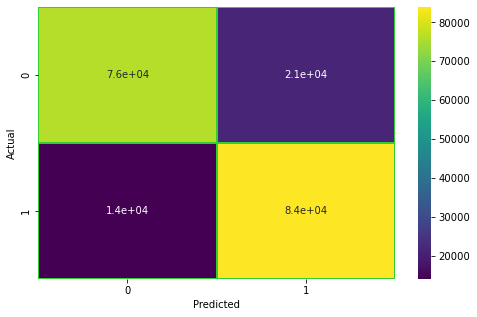

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test,y_pred_k),cmap = 'viridis',annot = True,linewidths = 2,linecolor = 'limegreen',fmt = '.2g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

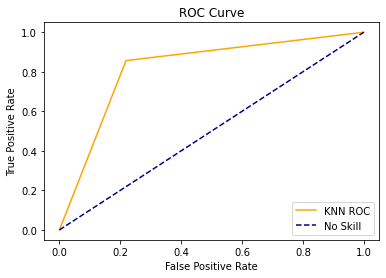

In [ ]:
fpr3,tpr3,threshold=roc_curve(y_test,y_pred_k)
plt.plot(fpr3, tpr3, color='orange', label='KNN ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**NAIVE BAYES - GaussianNB**

In [ ]:
gnb = GaussianNB()
clf_g = gnb.fit(x_train_s,y_train)
y_pred_g = clf_g.predict(x_test_s)
print(accuracy_score(y_test,y_pred_g)*100)
print(roc_auc_score(y_test,y_pred_g)*100)

78.04545989630518
77.98415431962209


In [ ]:
print(classification_report(y_test,y_pred_g))

              precision    recall  f1-score   support

           0       0.94      0.60      0.73     97363
           1       0.71      0.96      0.81     98018

    accuracy                           0.78    195381
   macro avg       0.82      0.78      0.77    195381
weighted avg       0.82      0.78      0.77    195381



Text(51.0, 0.5, 'Actual')

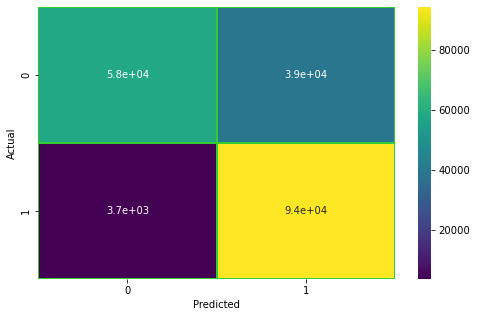

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test,y_pred_g),cmap = 'viridis',annot = True,linewidths = 2,linecolor = 'limegreen',fmt = '.2g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

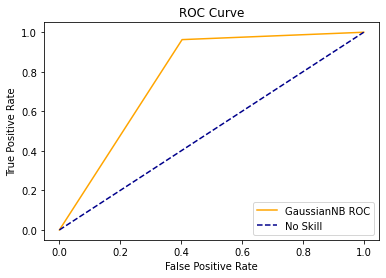

In [ ]:
fpr4,tpr4,threshold=roc_curve(y_test,y_pred_g)
plt.plot(fpr4, tpr4, color='orange', label='GaussianNB ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**XGBOOST WITH RANDOM FOREST CLASSIFIER**

In [ ]:
xgbrfc = XGBRFClassifier(n_jobs = -1,random_state = 1,learning_rate = 0.01)
clf_xr = xgbrfc.fit(x_train_s,y_train)
y_pred_xr = clf_xr.predict(x_test_s)
print(accuracy_score(y_test,y_pred_xr)*100)
print(roc_auc_score(y_test,y_pred_xr)*100)

[22:09:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
81.57087946115539
81.53392379248962


In [ ]:
print(classification_report(y_test,y_pred_xr))

              precision    recall  f1-score   support

           0       0.90      0.71      0.79     97363
           1       0.76      0.93      0.83     98018

    accuracy                           0.82    195381
   macro avg       0.83      0.82      0.81    195381
weighted avg       0.83      0.82      0.81    195381



Text(51.0, 0.5, 'Actual')

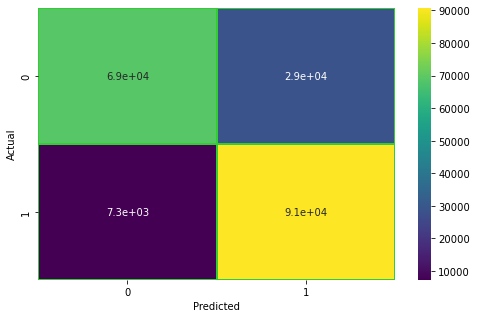

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test,y_pred_xr),cmap = 'viridis',annot = True,linewidths = 2,linecolor = 'limegreen',fmt = '.2g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

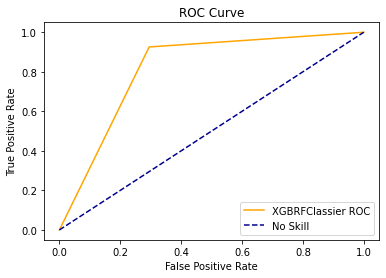

In [ ]:
fpr5,tpr5,threshold=roc_curve(y_test,y_pred_xr)
plt.plot(fpr5, tpr5, color='orange', label='XGBRFClassier ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**PLOTTING ALL THE ROC SCORE CURVE**

In [ ]:
'''
#Plot to show all the Roc Curve with Different Models
plt.figure(figsize=(20,15))
plt.plot(fpr, tpr, color='orange', label='Logistic ROC')
plt.plot(fpr1, tpr1, color='red', label='Random Forest ROC')
plt.plot(fpr2, tpr2, color='firebrick', label='XGBClassifier ROC')
plt.plot(fpr3, tpr3, color='indigo', label='KNN ROC')
plt.plot(fpr4, tpr4, color='saddlebrown', label='GaussianNB ROC')
plt.plot(fpr5, tpr5, color='lime', label='XGBRFClassier ROC')
plt.plot(fpr6, tpr6, color='royalblue', label='MLPClassifer ROC')
plt.plot([0, 1], [0, 1], color='darkslategrey', linestyle='--',label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
'''

"\n#Plot to show all the Roc Curve with Different Models\nplt.figure(figsize=(20,15))\nplt.plot(fpr, tpr, color='orange', label='Logistic ROC')\nplt.plot(fpr1, tpr1, color='red', label='Random Forest ROC')\nplt.plot(fpr2, tpr2, color='firebrick', label='XGBClassifier ROC')\nplt.plot(fpr3, tpr3, color='indigo', label='KNN ROC')\nplt.plot(fpr4, tpr4, color='saddlebrown', label='GaussianNB ROC')\nplt.plot(fpr5, tpr5, color='lime', label='XGBRFClassier ROC')\nplt.plot(fpr6, tpr6, color='royalblue', label='MLPClassifer ROC')\nplt.plot([0, 1], [0, 1], color='darkslategrey', linestyle='--',label='No Skill')\nplt.xlabel('False Positive Rate')\nplt.ylabel('True Positive Rate')\nplt.title('ROC Curve')\nplt.legend()\nplt.show()\n"

**So we can clearly see that Red line in the above graph cover maximum area and thus we can clearly say that Random Forest model is the best model for the prediction and also as the dataset was imbalanced and was made balance so we will use Roc Auc Score and Roc curve to state the prediction of our model.So in this dataset using Random Forest Classifier we are getting 84.16% roc auc score and also from the above graph it prove that the Random Forest Classifier Model is the Best Model.**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [ ]:
df_model1 = DecisionTreeClassifier()
df_model1.fit(x1,y1)

In [ ]:
plt.figure(figsize=(20,20))
tree.plot_tree(df_model1,filled=True,feature_names=x1.columns ,class_names = [str(i) for i in set(y1)])

In [ ]:
path = dt_model.cost_complexity_pruning_path(x_train,y_train)
ccp_alpha = path.ccp_alphas

In [ ]:
dt_modle2= [] 
for ccp in ccp_alpha :
    dt_m = DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(x_train, y_train)
    dt_modle2.append(dt_m)

In [ ]:
train_score = [i.score(x_train,y_train) for i in dt_modle2]
test_score = [i.score(x_test , y_test) for i in dt_modle2]

In [ ]:
fix ,ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(ccp_alpha,train_score,marker = 'o',label = 'train')
ax.plot(ccp_alpha,test_score,marker = 'o',label = 'test')
ax.legend()